### Prepare a classification model using Naive Bayes for salary data 

#### Importing Libearies 

In [50]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import pointbiserialr, spearmanr 

### Importing Traning Dataset 

In [3]:
train_data = pd.read_csv('F://Data_set/SalaryData_Train(1).csv')  

In [4]:
train_data.head()  

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Check any Null Value Present in the Dataset or Not

In [5]:
train_data.isnull().sum() 

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Check Dataset Information 

In [6]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
train_data.shape 

(30161, 14)

#### Visuvlizing the Given Dataset 

Visualization of workclass Column

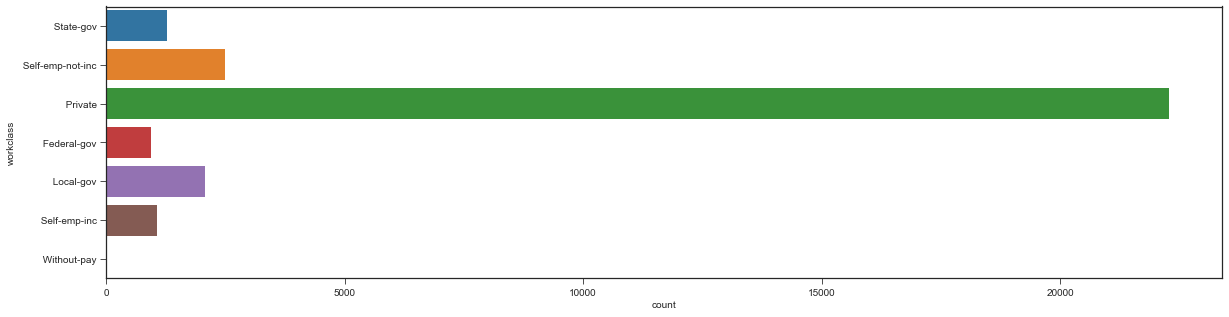

In [9]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="workclass", data=train_data) 

Visualization of education Column

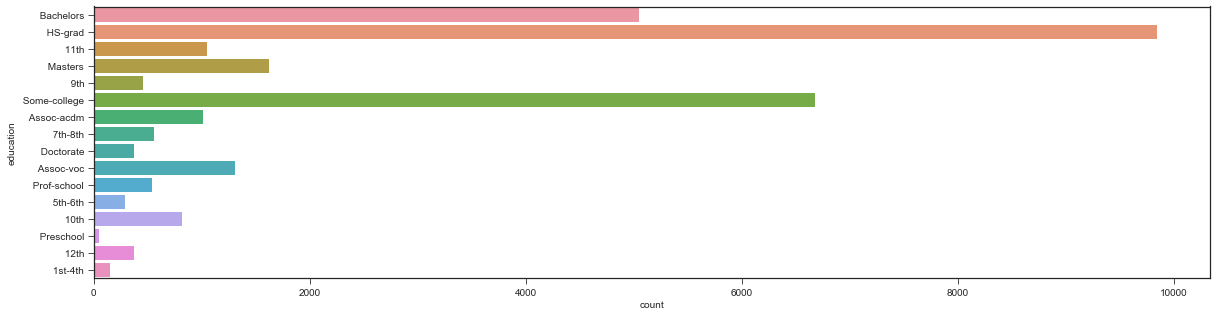

In [10]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=train_data)  

Visualization of maritalstatus Column

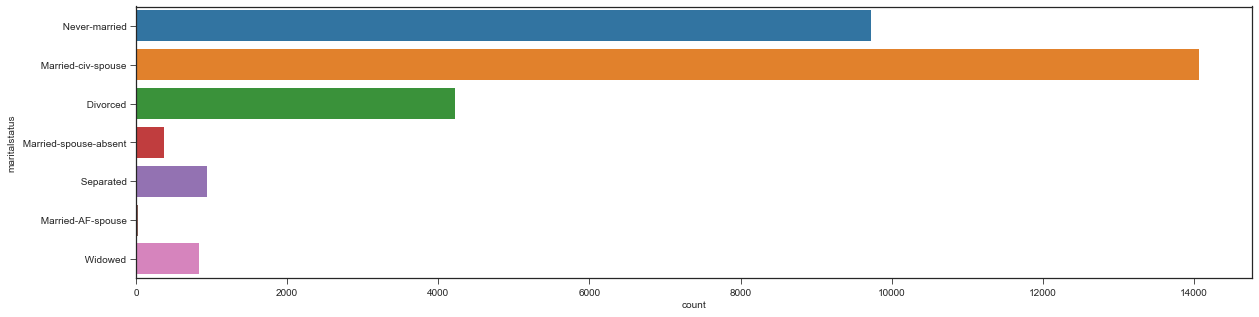

In [11]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=train_data)   

Visualization of occupation Column 

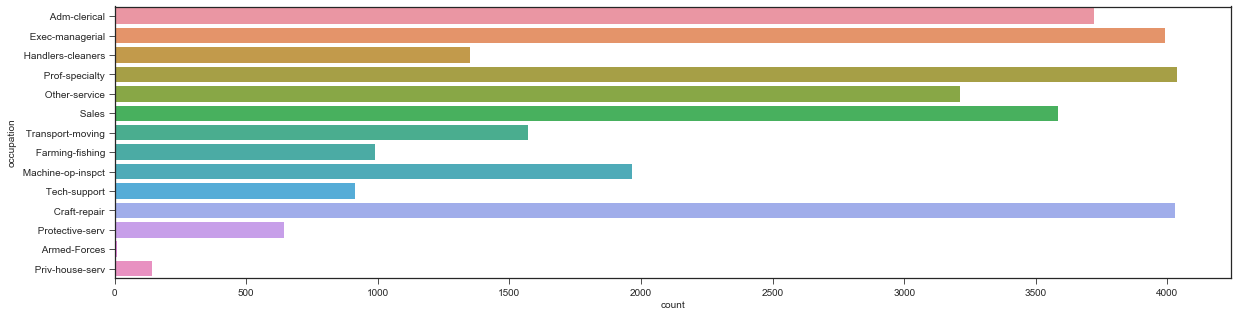

In [12]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="occupation", data=train_data) 

 Visualization of relationship Column 

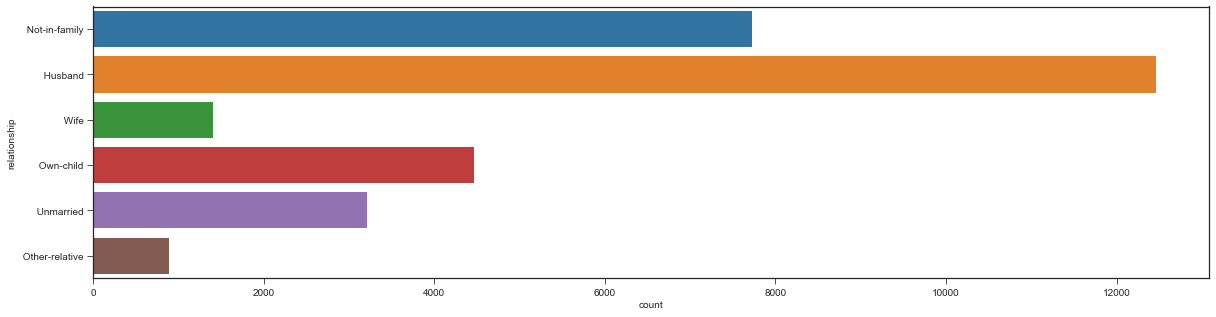

In [13]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="relationship", data=train_data) 

 Visualization of race Column

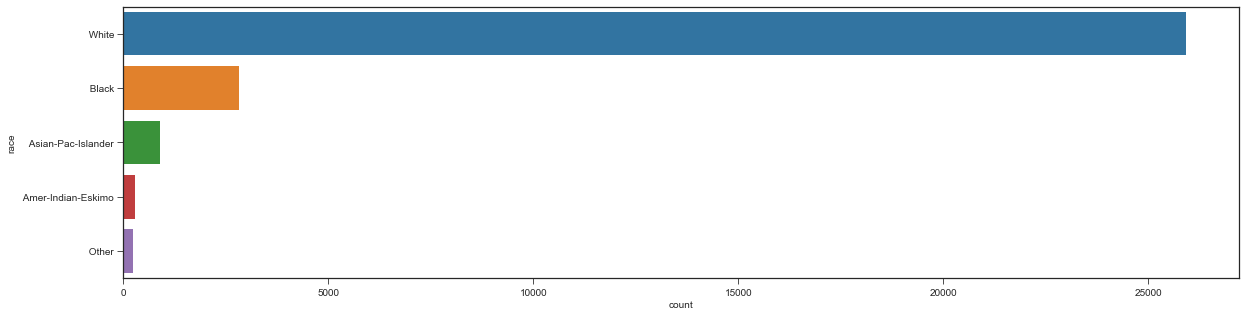

In [15]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="race", data=train_data) 

Visualization of sex Column

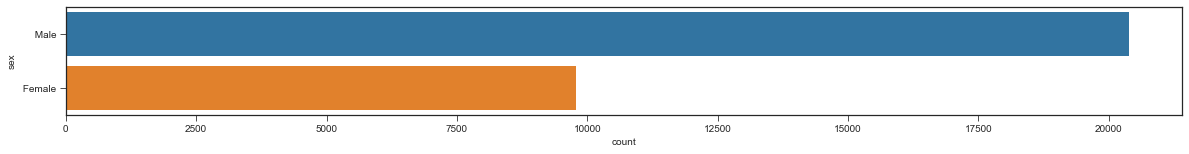

In [17]:
fig = plt.figure(figsize=(20,2)) 
plt.style.use('seaborn-ticks')
sns.countplot(y="sex", data=train_data) 

Visualization of native Column

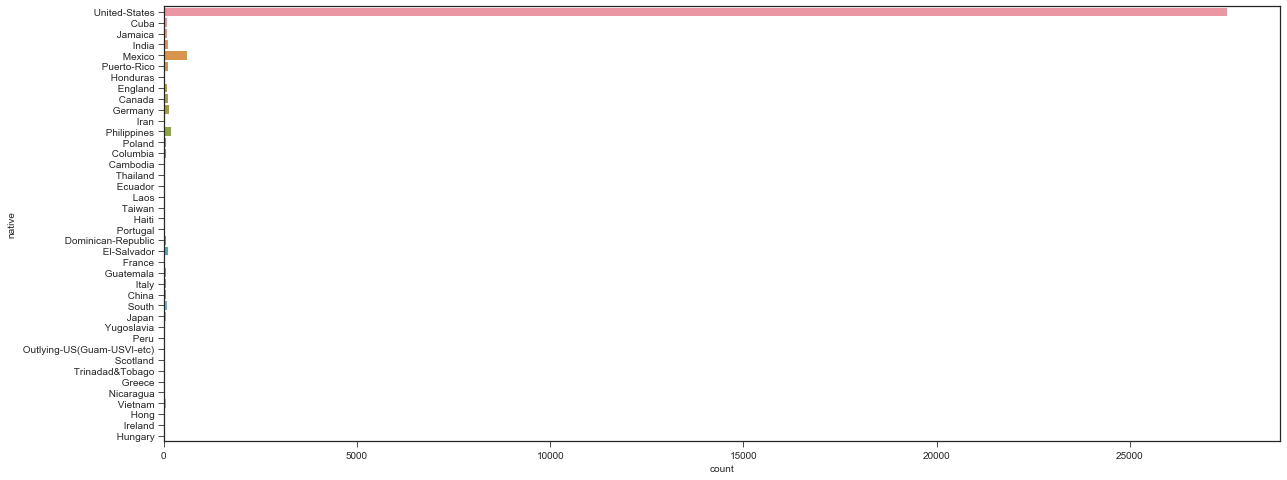

In [19]:
fig = plt.figure(figsize=(20,8)) 
plt.style.use('seaborn-ticks')
sns.countplot(y="native", data=train_data)

In [25]:
train_data.columns 

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

#### Explore Numerical Variables

In [55]:
numerical = [var for var in train_data.columns if train_data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical) 

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


View the Nuerical Variables 

In [56]:
train_data[numerical].head() 

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


Check any Null Value Present in the Numerical Dataset or Not 

In [65]:
train_data[numerical].isnull().sum() 

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

#### Explore categorical variables

In [28]:

categorical = [var for var in train_dataset.columns if train_dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical) 

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


View the Categorical Variables 

In [46]:
train_data[categorical].head()  

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Missing values in categorical variables

In [30]:
train_data[categorical].isnull().sum()  

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

#### Number of labels: cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [52]:
for var in categorical:
    
    print(var, ' contains ', len(train_dataset[var].unique()), ' labels') 

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


frequency for categorical fields

In [32]:
category_col =['workclass', 'race', 'education','maritalstatus', 'occupation',
               'relationship', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (train_data[c].value_counts()) 

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
race
 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      37

#### frequency distribution of categorical variables 

In [39]:
for var in categorical: 
    
    print(train_data[var].value_counts()/np.float(len(train_data))) 

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [35]:
train_dataset = train_data.copy() 

In [36]:
train_dataset.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True) 

convert categorical columns to numerical representations.

In [47]:
for col in category_col:
    b, c = np.unique(train_dataset[col], return_inverse=True) 
    train_dataset[col] = c

train_dataset.head()   
 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [57]:
train_dataset.shape 

(30161, 14)

#### Feature Selection

In [51]:
col_names = train_dataset.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "Salary":
        if len(train_dataset[c].unique()) <= 2:
            corr = spearmanr(train_dataset['Salary'],train_dataset[c])[0]
        else:
            corr = pointbiserialr(train_dataset['Salary'],train_dataset[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df 

,correlation,abs_corr
parameter,,
educationno,0.335287,0.335287
relationship,-0.250998,0.250998
age,0.241991,0.241991
hoursperweek,0.229480,0.229480
capitalgain,0.221195,0.221195
sex,0.216680,0.216680
maritalstatus,-0.193504,0.193504
capitalloss,0.150222,0.150222
education,0.079013,0.079013


#### Divide the Dataset in to Dependent and Independent Variable

Independent Variable 

In [63]:
X = train_dataset.iloc[:,0:13].values 

Dependent Variable 

In [59]:
Y = train_dataset.iloc[:,-1].values 

#### Applay Naive Baise algorithm and Create the Model 

In [66]:
from sklearn.naive_bayes import GaussianNB 

In [67]:
nb_classifier = GaussianNB() 

In [68]:
nb_classifier.fit(X,Y) 

GaussianNB(priors=None, var_smoothing=1e-09)

### Import Testing Dataset

In [69]:
test_data = pd.read_csv('F://Data_set/SalaryData_Test(1).csv') 

In [70]:
test_data.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Check any Null Value Present in the Test_Dataset or Not 

In [71]:
test_data.isnull().sum() 

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [72]:
test_data.shape 

(15060, 14)

In [73]:
test_dataset = test_data.copy() 

In [74]:
test_dataset.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True) 

convert categorical columns to numerical representations.

In [75]:
for col in category_col:
    b, c = np.unique(test_dataset[col], return_inverse=True) 
    test_dataset[col] = c

test_dataset.head()  

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [76]:
test_dataset.shape 

(15060, 14)

#### Feature Selection

In [77]:
col_names = test_dataset.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "Salary":
        if len(test_dataset[c].unique()) <= 2:
            corr = spearmanr(test_dataset['Salary'],test_dataset[c])[0]
        else:
            corr = pointbiserialr(test_dataset['Salary'],test_dataset[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df 

,correlation,abs_corr
parameter,,
educationno,0.327813,0.327813
relationship,-0.258335,0.258335
age,0.227469,0.227469
hoursperweek,0.222665,0.222665
capitalgain,0.220882,0.220882
sex,0.213863,0.213863
maritalstatus,-0.191058,0.191058
capitalloss,0.145967,0.145967
education,0.085554,0.085554


#### Divide the Dataset in to Dependent and Independent Variable

Independent Variable

In [78]:
X1 = test_dataset.iloc[:,0:13].values  

Dependent Variable

In [80]:
Y1 = test_dataset.iloc[:,-1].values  

#### Predict the Result

In [81]:
y_pred = nb_classifier.predict(X1)  

In [82]:
y_pred 

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### To find the Confussion Matrix

In [83]:
from sklearn.metrics import confusion_matrix 

In [84]:
cm = confusion_matrix(Y1,y_pred) 

In [85]:
cm 

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

#### To Check the Accuracy of the Model 

In [86]:
from sklearn.metrics import accuracy_score 

In [87]:
accuracy = accuracy_score(Y1,y_pred)  

In [88]:
accuracy 

0.7946879150066402

#### Check for overfitting and underfitting

In [89]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(nb_classifier.score(X,Y)))

print('Test set score: {:.4f}'.format(nb_classifier.score(X1, Y1))) 

Training set score: 0.7953
Test set score: 0.7947


The training-set accuracy score is 0.7953 while the test-set accuracy to be 0.7947. These two values are quite comparable. So, there is no sign of overfitting.

#### # visualize confusion matrix with seaborn heatmap 

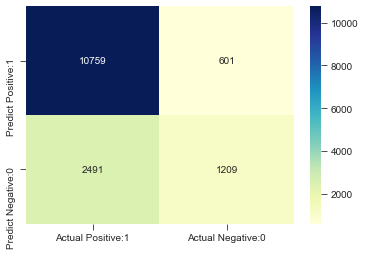

In [91]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 

#### Classification metrices 

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(Y1, y_pred)) 

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



0 means <=50k and 1 means >50k 

#### Classification accuracy 

In [96]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [97]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy)) 

Classification accuracy : 0.7947


#### Classification error

In [98]:

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error)) 

Classification error : 0.2053


#### Precision 

In [99]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision)) 

Precision : 0.9471


#### Recall

In [100]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall)) 

Recall or Sensitivity : 0.8120


#### True Positive Rate

In [101]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8120


#### False Positive Rate

In [102]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate)) 

False Positive Rate : 0.3320


#### Specificity 

In [103]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6680


#### Calculate class probabilities 

In [105]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = nb_classifier.predict_proba(X1)[0:10]

y_pred_prob 

array([[9.99996933e-01, 3.06748413e-06],
       [9.24531822e-01, 7.54681781e-02],
       [9.57529122e-01, 4.24708780e-02],
       [3.56671905e-13, 1.00000000e+00],
       [9.99991090e-01, 8.90964666e-06],
       [1.30041077e-02, 9.86995892e-01],
       [9.99911559e-01, 8.84414581e-05],
       [9.99692038e-01, 3.07961799e-04],
       [2.49518770e-09, 9.99999998e-01],
       [8.28798617e-01, 1.71201383e-01]])

store the probabilities in dataframe

In [106]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999969e-01,0.000003
1,9.245318e-01,0.075468
2,9.575291e-01,0.042471
3,3.566719e-13,1.000000
4,9.999911e-01,0.000009
5,1.300411e-02,0.986996
6,9.999116e-01,0.000088
7,9.996920e-01,0.000308
8,2.495188e-09,1.000000
9,8.287986e-01,0.171201


print the first 10 predicted probabilities for class 1 - Probability of >50K

In [107]:
nb_classifier.predict_proba(X1)[0:10, 1] 

array([3.06748413e-06, 7.54681781e-02, 4.24708780e-02, 1.00000000e+00,
       8.90964666e-06, 9.86995892e-01, 8.84414581e-05, 3.07961799e-04,
       9.99999998e-01, 1.71201383e-01])

store the predicted probabilities for class 1 - Probability of >50K

In [108]:
y_pred_proba1 = nb_classifier.predict_proba(X1)[:, 1]  

#### plot histogram of predicted probabilitie

Text(0, 0.5, 'Frequency')

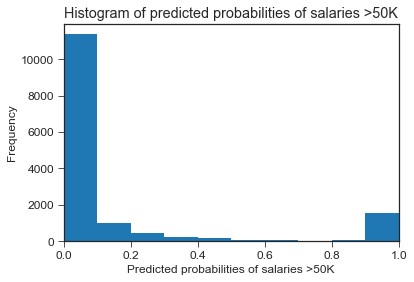

In [109]:
# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_proba1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency') 

#### Plot Predictions

In [116]:
test_dataset['target'] = y_pred 

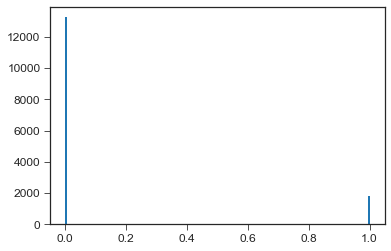

In [121]:
test_dataset.loc[ test_dataset['target']>1 , 'target'] = 1
b = plt.hist(test_dataset['target'], bins=200) 